<a href="https://colab.research.google.com/github/Jinops/ml-study/blob/main/week01/week01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [ ]:
!pip install -q seaborn

import pathlib
import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

dataset.isna().sum()
dataset = dataset.dropna()
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

## Data Graph (not required)

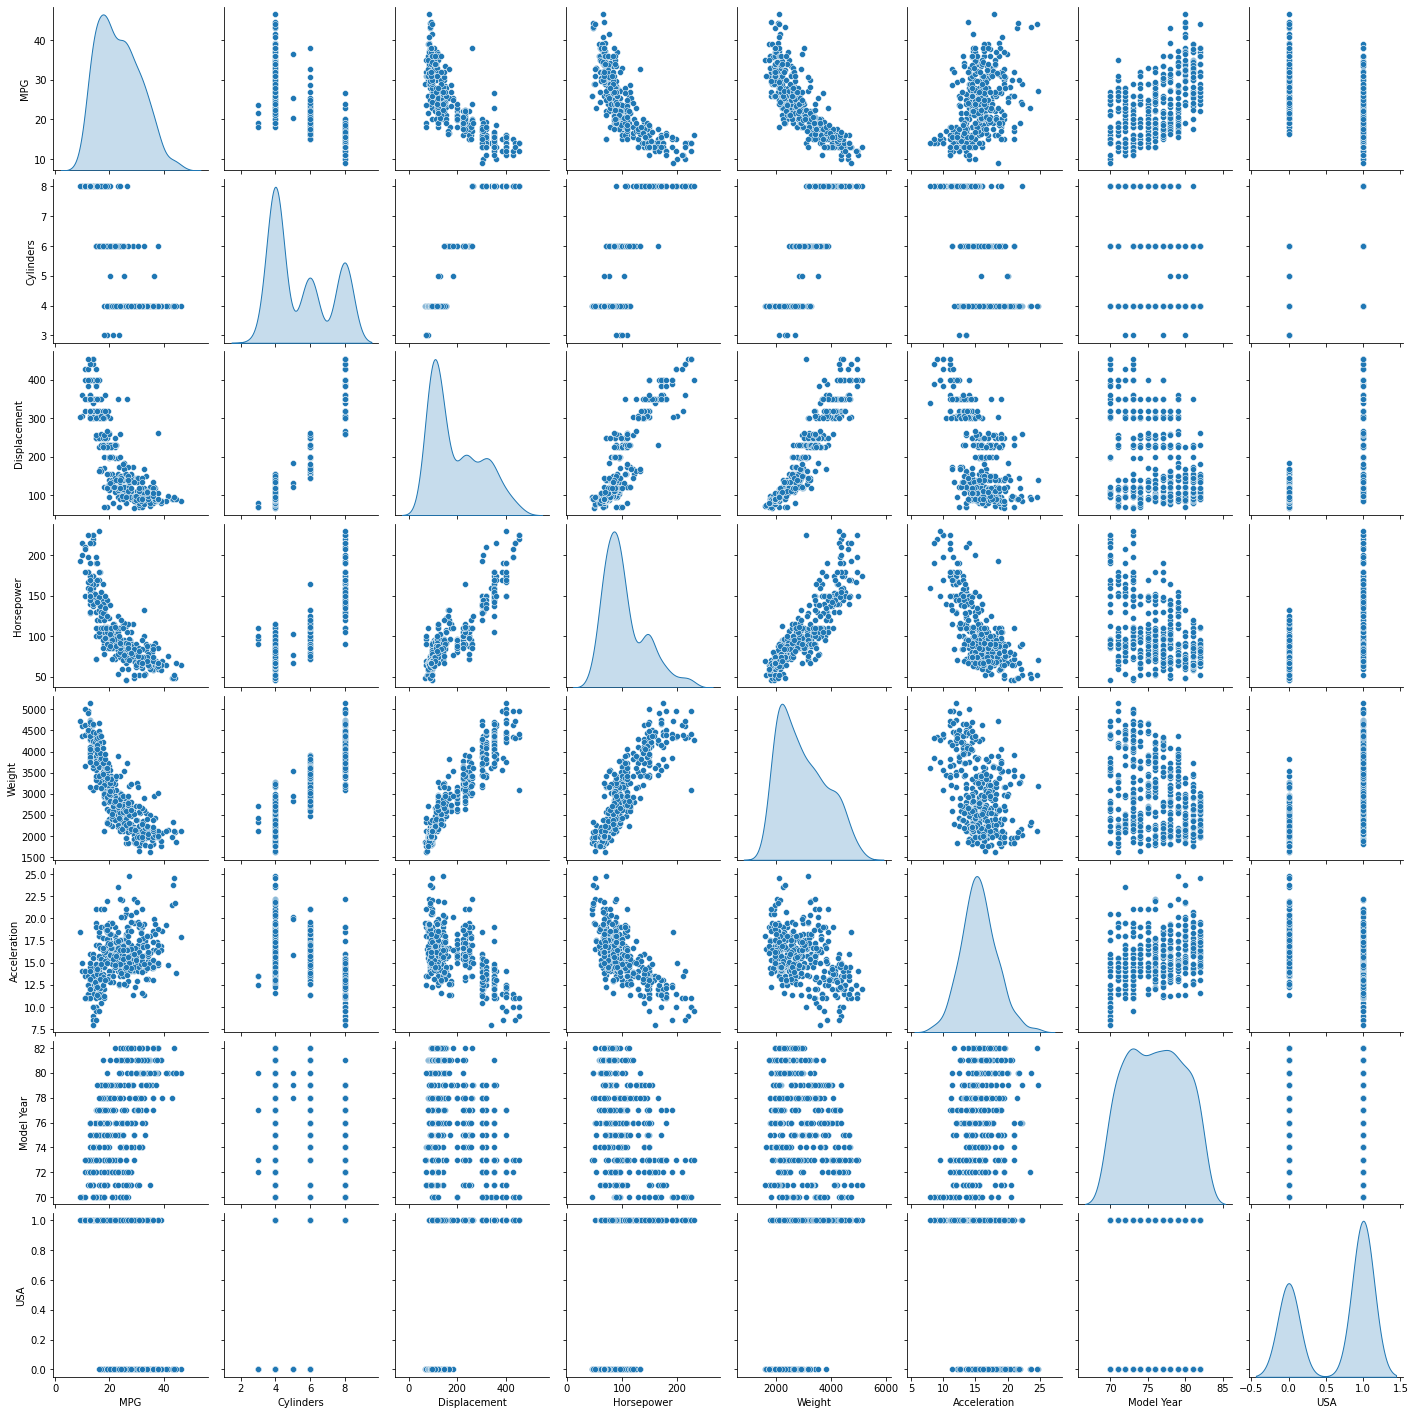

In [ ]:
# Only For Graph
sns.pairplot(dataset[['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'USA']], diag_kind="kde")

In [ ]:
# Only For Graph
stats = dataset.describe()
stats.pop("MPG")
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


<Axes: >

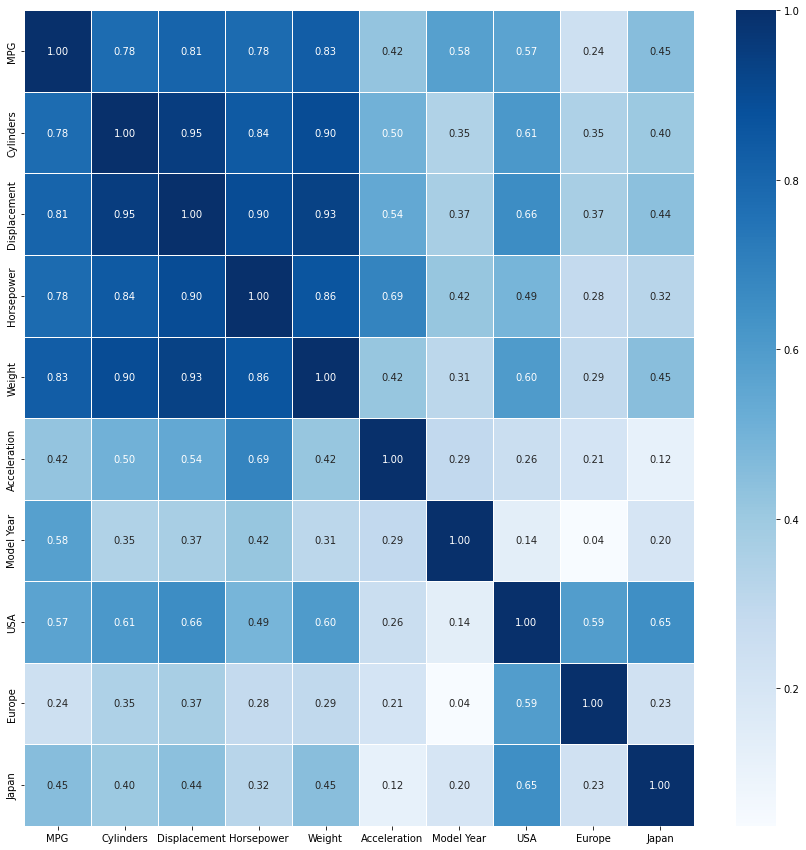

In [ ]:
# Only For Graph
plt.figure(figsize=(15,15))
sns.heatmap(data = abs(dataset.corr()), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## **Modeling**

In [ ]:
target = dataset['MPG'].to_numpy()
input = dataset['Horsepower'].to_numpy()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.2)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

lr = LinearRegression()
lr.fit(train_input, train_target)

print("Train: ", lr.score(train_input, train_target))
print("Test : ", lr.score(test_input, test_target))

Train:  0.5967219401179462
Test :  0.6459944058455007


In [ ]:
# 다항회귀

import numpy

target = dataset['MPG'].to_numpy()
input = dataset[['Weight', 'Displacement', 'Cylinders', 'Horsepower']].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.2)

lr.fit(train_input, train_target)

print("Train: ", lr.score(train_input, train_target))
print("Test : ", lr.score(test_input, test_target))

# train_input = train_input.transpose()
# test_input = test_input.transpose()

# train_poly = numpy.column_stack((train_input[0], train_input[1], train_input[2], train_input[3]))
# test_poly = numpy.column_stack((test_input[0], test_input[1], test_input[2], test_input[3]))

Train:  0.7183150299132555
Test :  0.664729007496506
